In [1]:
import sys
import os

import pandas as pd
import numpy as np
import warnings
import arff

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats

from matplotlib import cm

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition, ensemble
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans

In [2]:
%matplotlib inline
rawpath = "../project/volume/data/raw/"

In [3]:
# Innovation Rates by Childhood CZ 
table_1 = pd.read_csv(os.path.join(rawpath, "bell/table_2a.csv")) 

In [4]:
# Commuting Zone characteristics 
czcar= pd.read_csv(os.path.join(rawpath, "czchar.csv"),
                   skiprows=6,
                   header=0) 

In [5]:
dtafile = os.path.join(rawpath, "CZ_main.dta")

main = pd.read_stata(dtafile)
main.head()

,cz,iso,urbanareas,localtaxrate,am,pq5q1,pq5q2,schoolexpenditureperstudent,laborforceparticipationrate,manufacturingemploymentshare,...,pop,popgrowth,income,gvt,finance,Cit5_corr_incumbent,Cit5_corr_entrant,lobbying_bartik,lgdppc,patent
0,100.0,TN,1,20.0,38.387501,6.219881,9.68395,5.184547,0.587347,0.237397,...,515673.181818,0.006384,1.325678e+07,0.984492,0.565163,153.933014,23.642666,314216988.0,3.246791,123.246269
1,200.0,TN,1,23.0,37.776749,5.365194,9.49096,4.505886,0.624974,0.237756,...,238895.090909,0.017123,5.767876e+06,1.013324,0.558196,12.993155,4.007419,156949268.0,3.184035,19.177273
2,301.0,TN,0,15.0,39.049252,7.263514,10.91633,5.614119,0.478963,0.233531,...,66839.181818,0.001944,1.375117e+06,1.652556,1.330033,0.333361,0.757114,130183232.0,3.024005,0.583333
3,302.0,TN,1,19.0,37.841251,5.628121,10.38549,4.899846,0.614831,0.145505,...,755240.818182,0.011127,2.207135e+07,0.909186,0.841473,239.755859,43.429382,275959444.0,3.374999,168.095520
4,401.0,NC,1,18.0,36.969250,4.480079,9.74457,5.462677,0.656087,0.215199,...,511260.090909,0.012112,1.613724e+07,0.876412,0.530351,137.846619,12.469249,152210904.0,3.452007,95.385315


In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 676
Data columns (total 22 columns):
cz                              677 non-null float64
iso                             677 non-null object
urbanareas                      677 non-null int8
localtaxrate                    677 non-null float32
am                              667 non-null float32
pq5q1                           675 non-null float32
pq5q2                           675 non-null float32
schoolexpenditureperstudent     673 non-null float32
laborforceparticipationrate     677 non-null float32
manufacturingemploymentshare    677 non-null float32
pq5                             675 non-null float32
Cit5_corr                       677 non-null float32
pop                             676 non-null float64
popgrowth                       676 non-null float32
income                          676 non-null float64
gvt                             676 non-null float32
finance                         676 non-null float3

In [7]:
main.rename(columns = {'cz':'CZ'}, inplace = True)

In [8]:
part = main[["CZ","Cit5_corr",'Cit5_corr_incumbent',"patent",'pop','popgrowth',
             'laborforceparticipationrate','Cit5_corr_entrant','lobbying_bartik']]

In [9]:
part = part.astype({'CZ':int})

In [10]:
czcar= czcar.drop(czcar.index[0])

In [11]:
czcar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 1 to 741
Data columns (total 41 columns):
CZ                                            741 non-null object
CZ Name                                       741 non-null object
State                                         741 non-null object
Census 2000 population                        741 non-null object
Urban Areas                                   741 non-null object
Frac. Black                                   741 non-null object
Racial Segregation                            741 non-null object
Income Segregation                            741 non-null object
Segregation of Poverty (<p25)                 741 non-null object
Segregation of Affluence (>p75)               741 non-null object
Frac. with Commute < 15 Mins                  741 non-null object
Household Income per capita                   741 non-null object
Gini                                          741 non-null object
Top 1% Income Share                  

In [12]:
table_1.head()

,cz,czname,state,stateabbrv,cohort,age,year,count,applicant,grantee,...,grantee_cat_6,grantee_cat_7,count_g_m,applicant_g_m,grantee_g_m,num_grants_g_m,count_g_f,applicant_g_f,grantee_g_f,num_grants_g_f
0,100,Johnson City,Tennessee,TN,1916,80,1996,820,NaN,0.0,...,0.0,0.0,390.0,NaN,0.0,0.0,430.0,NaN,0.0,0.0
1,100,Johnson City,Tennessee,TN,1917,79,1996,1070,NaN,0.0,...,0.0,0.0,620.0,NaN,0.0,0.0,450.0,NaN,0.0,0.0
2,100,Johnson City,Tennessee,TN,1917,80,1997,1040,NaN,0.0,...,0.0,0.0,580.0,NaN,0.0,0.0,460.0,NaN,0.0,0.0
3,100,Johnson City,Tennessee,TN,1918,78,1996,1240,NaN,0.0,...,0.0,0.0,580.0,NaN,0.0,0.0,660.0,NaN,0.0,0.0
4,100,Johnson City,Tennessee,TN,1918,79,1997,1110,NaN,0.0,...,0.0,0.0,530.0,NaN,0.0,0.0,580.0,NaN,0.0,0.0


In [13]:
Data1 = czcar[["CZ",'Frac. with Commute < 15 Mins']]

In [14]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 1 to 741
Data columns (total 2 columns):
CZ                              741 non-null object
Frac. with Commute < 15 Mins    741 non-null object
dtypes: object(2)
memory usage: 17.4+ KB


In [15]:
Data1.head()

,CZ,Frac. with Commute < 15 Mins
1,100,0.325
2,200,0.276
3,301,0.359
4,302,0.269
5,401,0.292


In [16]:
Data1 = Data1.astype({'CZ':int})

In [17]:
Data3=Data1.merge(part,on=['CZ'],
                  how='left',
                  suffixes=('', '_notnull'))

In [18]:
Data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 10 columns):
CZ                              741 non-null int32
Frac. with Commute < 15 Mins    741 non-null object
Cit5_corr                       677 non-null float32
Cit5_corr_incumbent             677 non-null float32
patent                          677 non-null float32
pop                             676 non-null float64
popgrowth                       676 non-null float32
laborforceparticipationrate     677 non-null float32
Cit5_corr_entrant               677 non-null float32
lobbying_bartik                 677 non-null float64
dtypes: float32(6), float64(2), int32(1), object(1)
memory usage: 43.4+ KB


In [19]:
df=Data3

In [20]:
df.head()

,CZ,Frac. with Commute < 15 Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik
0,100,0.325,204.289795,153.933014,123.246269,515673.181818,0.006384,0.587347,23.642666,314216988.0
1,200,0.276,27.449158,12.993155,19.177273,238895.090909,0.017123,0.624974,4.007419,156949268.0
2,301,0.359,0.844502,0.333361,0.583333,66839.181818,0.001944,0.478963,0.757114,130183232.0
3,302,0.269,328.072876,239.755859,168.095520,755240.818182,0.011127,0.614831,43.429382,275959444.0
4,401,0.292,172.762436,137.846619,95.385315,511260.090909,0.012112,0.656087,12.469249,152210904.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 741 entries, 0 to 740
Data columns (total 10 columns):
CZ                              741 non-null int32
Frac. with Commute < 15 Mins    741 non-null object
Cit5_corr                       677 non-null float32
Cit5_corr_incumbent             677 non-null float32
patent                          677 non-null float32
pop                             676 non-null float64
popgrowth                       676 non-null float32
laborforceparticipationrate     677 non-null float32
Cit5_corr_entrant               677 non-null float32
lobbying_bartik                 677 non-null float64
dtypes: float32(6), float64(2), int32(1), object(1)
memory usage: 43.4+ KB


In [22]:
df.dropna(subset=["Cit5_corr"],inplace=True)

In [23]:
df = df.fillna(0)

In [24]:
df.rename(columns = {'Gini Bottom 99%':'Gini_99',
                     'Frac. with Commute < 15 Mins':'Commute_less_15_Mins',
                     'Growth in Chinese Imports 1990-2000':'Growth_chinese_imports',
                     'Income Growth 2000-2006/10':'Income_growth'}, inplace = True)

In [25]:
arff.dump('.arff',
          df.values,
          names=df.columns)

In [26]:
train=df

In [27]:
train=train.astype('float64')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 677 entries, 0 to 740
Data columns (total 10 columns):
CZ                             677 non-null float64
Commute_less_15_Mins           677 non-null float64
Cit5_corr                      677 non-null float64
Cit5_corr_incumbent            677 non-null float64
patent                         677 non-null float64
pop                            677 non-null float64
popgrowth                      677 non-null float64
laborforceparticipationrate    677 non-null float64
Cit5_corr_entrant              677 non-null float64
lobbying_bartik                677 non-null float64
dtypes: float64(10)
memory usage: 58.2 KB


In [29]:
train.dropna(subset = ["Cit5_corr"], inplace=True)

In [30]:
train.head()

,CZ,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik
0,100.0,0.325,204.289795,153.933014,123.246269,515673.181818,0.006384,0.587347,23.642666,314216988.0
1,200.0,0.276,27.449158,12.993155,19.177273,238895.090909,0.017123,0.624974,4.007419,156949268.0
2,301.0,0.359,0.844502,0.333361,0.583333,66839.181818,0.001944,0.478963,0.757114,130183232.0
3,302.0,0.269,328.072876,239.755859,168.095520,755240.818182,0.011127,0.614831,43.429382,275959444.0
4,401.0,0.292,172.762436,137.846619,95.385315,511260.090909,0.012112,0.656087,12.469249,152210904.0


In [31]:
raw_df=train.drop(columns=['CZ'])

In [32]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA() 
pca.fit(normalized_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
pca.explained_variance_ratio_

array([3.79589984e-01, 2.59157190e-01, 1.90021870e-01, 8.56687780e-02,
       7.49759709e-02, 8.00306200e-03, 2.03347095e-03, 5.19077232e-04,
       3.05970908e-05])

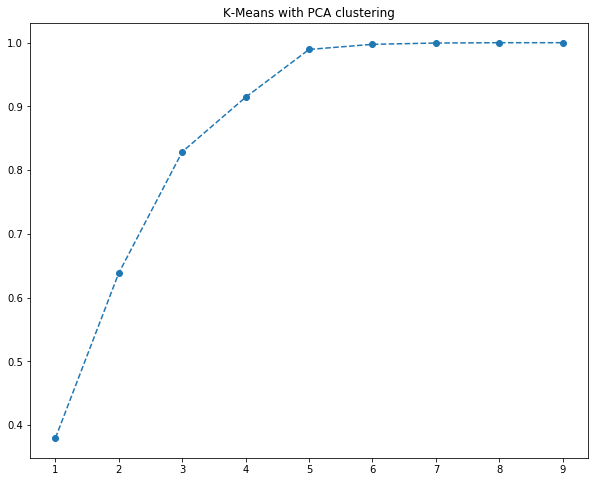

In [34]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(),marker ='o',linestyle ='--');
plt.title('K-Means with PCA clustering');

In [35]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
pca.fit_transform(normalized_df)

array([[ 0.76704481, -0.24203884,  0.61076107],
       [ 0.84996544, -0.02796428, -0.45515543],
       [ 0.00804425, -0.94547383,  0.04599718],
       ...,
       [ 0.1932931 ,  0.38131609, -0.88318509],
       [-0.19401424, -0.68263622, -0.51633415],
       [ 0.4800259 ,  0.28559956,  0.25900078]])

In [36]:
scores_pca = pca.transform(normalized_df)

In [37]:
wcss = []
for k in range(1, 21):
    kmeans_pca = KMeans(n_clusters=k, init='k-means++',random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

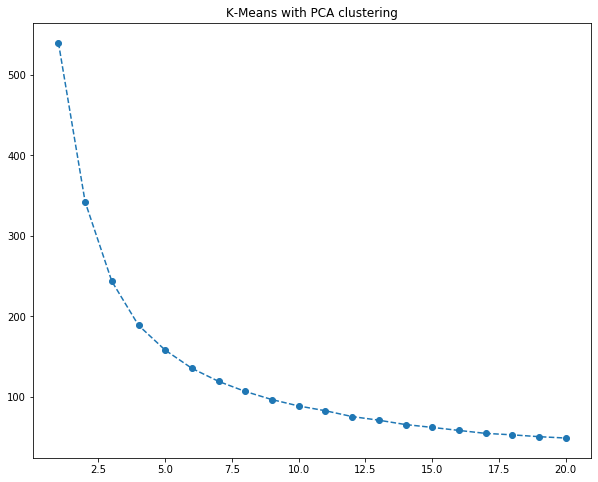

In [38]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker ='o',linestyle ='--')
plt.title('K-Means with PCA clustering');

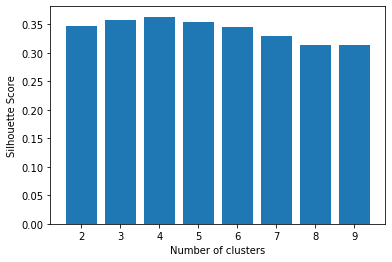

In [39]:
silhouette_scores = []

k = list(range(2,10))

for n_cluster in k:
    silhouette_scores.append(
        silhouette_score(scores_pca,
                         KMeans(n_clusters = n_cluster,
                                init='k-means++').fit_predict(scores_pca)
                        )
    )
    
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10);
plt.ylabel('Silhouette Score', fontsize = 10);
plt.show()

In [40]:
n_clust = k[np.argmax(silhouette_scores)]
kmeans_pca = KMeans(n_clusters=n_clust, init='k-means++',random_state = 42)
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [41]:
category=kmeans_pca.labels_
category

array([3, 0, 2, 3, 0, 2, 3, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 3, 3,
       0, 0, 3, 2, 0, 3, 3, 2, 2, 0, 3, 3, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2,
       2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 3, 2, 2, 3, 2, 0, 3, 0, 3, 0, 0, 3, 0, 2, 2,
       0, 0, 3, 2, 0, 0, 3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 3,
       2, 0, 3, 3, 2, 2, 2, 3, 2, 0, 0, 0, 0, 3, 2, 2, 2, 3, 0, 0, 2, 0,
       2, 3, 3, 2, 0, 3, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 2, 2, 0, 3, 2,
       0, 2, 2, 2, 2, 0, 3, 2, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 2, 3, 3, 0,
       0, 2, 2, 3, 0, 1, 3, 2, 3, 3, 0, 0, 0, 3, 0, 0, 3, 1, 1, 3, 1, 3,
       0, 1, 1, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 0, 3, 0, 3, 3, 3, 2, 2, 2,
       2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 0, 2,
       0, 0, 3, 2, 2, 3, 3, 1, 1, 1, 2, 2, 3, 2, 3, 2, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 0, 0, 2, 3, 2, 3, 3, 1, 3, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1,
       2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 3, 0, 0, 0, 1,

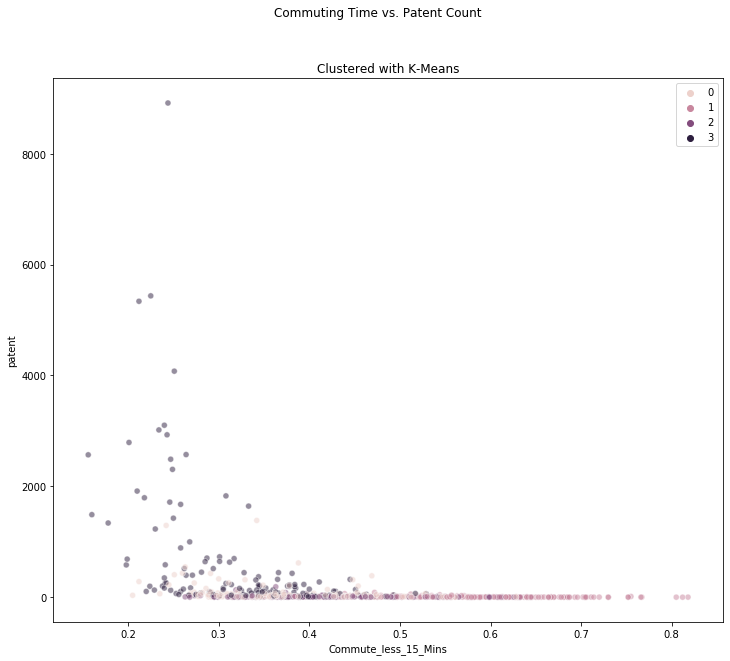

In [77]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(raw_df.Commute_less_15_Mins,
                raw_df.patent,
                hue=category, alpha=0.5)
plt.suptitle("Commuting Time vs. Patent Count");
plt.title("Clustered with K-Means");
#plt.legend(scatters, ["II0", "II1", "II2", "II3"])

In [43]:
raw_df["label"]=category

In [44]:
raw_df.head()

,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik,label
0,0.325,204.289795,153.933014,123.246269,515673.181818,0.006384,0.587347,23.642666,314216988.0,3
1,0.276,27.449158,12.993155,19.177273,238895.090909,0.017123,0.624974,4.007419,156949268.0,0
2,0.359,0.844502,0.333361,0.583333,66839.181818,0.001944,0.478963,0.757114,130183232.0,2
3,0.269,328.072876,239.755859,168.095520,755240.818182,0.011127,0.614831,43.429382,275959444.0,3
4,0.292,172.762436,137.846619,95.385315,511260.090909,0.012112,0.656087,12.469249,152210904.0,0


In [45]:
f=raw_df[['patent', 'Cit5_corr', 'lobbying_bartik',
          'laborforceparticipationrate',
          'Commute_less_15_Mins', 'pop','popgrowth',
          'label']].groupby(["label"],
                            as_index=False).mean()

f.sort_values('patent', ascending=False)

,label,patent,Cit5_corr,lobbying_bartik,laborforceparticipationrate,Commute_less_15_Mins,pop,popgrowth
3,3,530.007874,1301.372191,2.824351e+08,0.646912,0.332810,1.298502e+06,0.007812
0,0,78.582177,178.044207,1.250841e+08,0.633825,0.376523,3.325950e+05,0.015608
2,2,8.175781,13.449665,1.323011e+08,0.547346,0.416043,1.180650e+05,0.002388
1,1,6.807128,13.622087,9.766630e+07,0.637656,0.583941,5.441615e+04,-0.001958


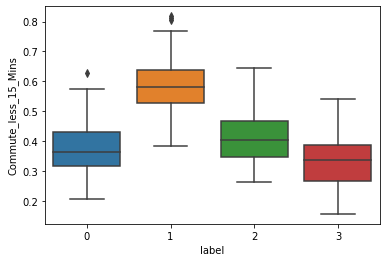

In [46]:
sns.boxplot(x='label', y='Commute_less_15_Mins', data=raw_df);

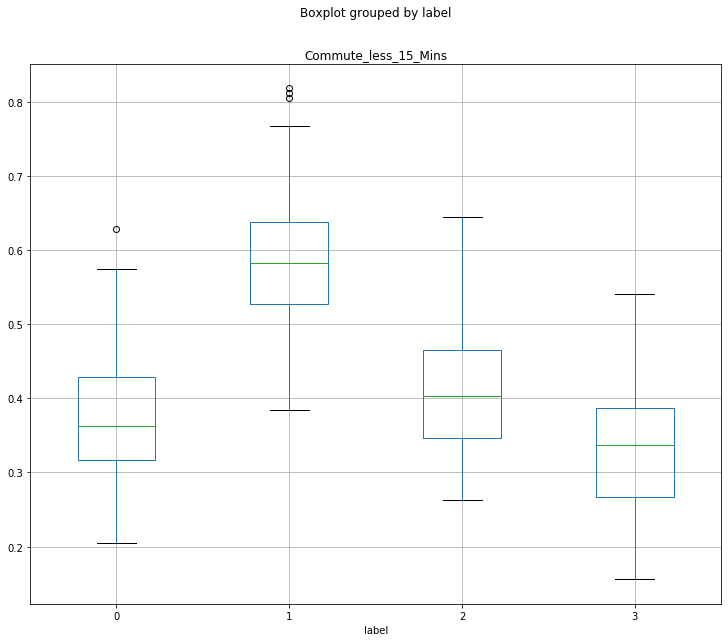

In [47]:
fig, ax = plt.subplots(figsize=(12,10))
raw_df.boxplot(column='Commute_less_15_Mins', by='label', ax=ax);
#plt.title('');

In [48]:
g=raw_df.groupby(["label"], as_index=False).mean()
g.sort_values('patent', ascending=False)

,label,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik
3,3,0.332810,1301.372191,959.968973,530.007874,1.298502e+06,0.007812,0.646912,143.698531,2.824351e+08
0,0,0.376523,178.044207,135.003902,78.582177,3.325950e+05,0.015608,0.633825,17.395357,1.250841e+08
2,2,0.416043,13.449665,8.603906,8.175781,1.180650e+05,0.002388,0.547346,2.345296,1.323011e+08
1,1,0.583941,13.622087,11.221435,6.807128,5.441615e+04,-0.001958,0.637656,1.746467,9.766630e+07


In [49]:
train["label"]=category

In [50]:
train_3=train[train.label == 3]

In [51]:
train_3.head()

,CZ,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik,label
0,100.0,0.325,204.289795,153.933014,123.246269,5.156732e+05,0.006384,0.587347,23.642666,314216988.0,3
3,302.0,0.269,328.072876,239.755859,168.095520,7.552408e+05,0.011127,0.614831,43.429382,275959444.0,3
6,500.0,0.305,320.718445,234.921234,163.259766,9.791536e+05,0.013241,0.665945,36.247326,200898578.0,3
11,900.0,0.241,452.079102,291.500366,254.078812,1.555225e+06,0.028807,0.696022,70.180588,288613380.0,3
20,1302.0,0.327,84.826973,67.406601,52.151619,5.751769e+05,0.015912,0.614527,2.939733,249492674.0,3


In [52]:
czcar_name = czcar[["CZ",'CZ Name']]
czcar_name = czcar_name.astype({'CZ':int})

In [53]:
train_3_z=train_3.merge(czcar_name,on=['CZ'], how='left',suffixes=('', '_notnull'))

In [54]:
train_top=train_3_z[train_3_z.patent>530.007874]

In [55]:
train_top.head()

,CZ,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik,label,CZ Name
6,1701.0,0.250,3400.780029,2504.281982,1425.043335,1.545003e+06,0.029327,0.694439,300.106537,375793620.0,3,Raleigh
28,7000.0,0.198,1484.309570,821.033264,582.006104,4.086674e+06,0.010803,0.597902,242.976868,122473228.0,3,Miami
35,9100.0,0.178,2987.438477,2125.151855,1338.059326,4.082826e+06,0.025995,0.709158,439.400299,621125283.0,3,Atlanta
41,11302.0,0.199,1431.462769,936.053284,686.801453,2.564954e+06,0.005633,0.663486,210.660782,267634756.0,3,Baltimore
42,11304.0,0.160,3563.491699,1825.623047,1488.676270,3.458400e+06,0.013580,0.713648,712.264221,566375060.0,3,Washington DC


In [56]:
np.seterr(divide='ignore', invalid='ignore')
z_scores = stats.zscore(train_3)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = train_3[filtered_entries]

In [57]:
any(filtered_entries)

False

In [58]:
new_df

,CZ,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik,label


In [59]:
train_3.head()

,CZ,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik,label
0,100.0,0.325,204.289795,153.933014,123.246269,5.156732e+05,0.006384,0.587347,23.642666,314216988.0,3
3,302.0,0.269,328.072876,239.755859,168.095520,7.552408e+05,0.011127,0.614831,43.429382,275959444.0,3
6,500.0,0.305,320.718445,234.921234,163.259766,9.791536e+05,0.013241,0.665945,36.247326,200898578.0,3
11,900.0,0.241,452.079102,291.500366,254.078812,1.555225e+06,0.028807,0.696022,70.180588,288613380.0,3
20,1302.0,0.327,84.826973,67.406601,52.151619,5.751769e+05,0.015912,0.614527,2.939733,249492674.0,3


In [60]:
new_df=new_df.merge(czcar_name,on=['CZ'], how='left',suffixes=('', '_notnull'))

In [61]:
dfObj = pd.DataFrame(train_3, index=[287, 596, 726])

In [62]:
dfObj

,CZ,Commute_less_15_Mins,Cit5_corr,Cit5_corr_incumbent,patent,pop,popgrowth,laborforceparticipationrate,Cit5_corr_entrant,lobbying_bartik,label
287,20901.0,0.308,4344.312500,3262.227295,1827.115112,3.466619e+06,0.005191,0.665576,401.569000,362641792.0,3
596,33100.0,0.218,4312.817871,2815.076416,1793.126709,3.644297e+06,0.023319,0.699188,497.141510,276682586.0,3
726,38801.0,0.258,4398.890625,3811.076904,1674.297119,1.932147e+06,0.015137,0.694289,261.878326,208019555.0,3


In [63]:
what=main[main.CZ == 38801]

In [64]:
what_2=czcar_name[czcar_name.CZ == 38801]

In [65]:
what

,CZ,iso,urbanareas,localtaxrate,am,pq5q1,pq5q2,schoolexpenditureperstudent,laborforceparticipationrate,manufacturingemploymentshare,...,pop,popgrowth,income,gvt,finance,Cit5_corr_incumbent,Cit5_corr_entrant,lobbying_bartik,lgdppc,patent
664,38801.0,OR,1,31.0,41.282249,9.305854,12.86814,6.704373,0.694289,0.155428,...,1.932147e+06,0.015137,6.787473e+07,0.941911,0.528781,3811.076904,261.878326,208019555.0,3.559032,1674.297119


In [66]:
what_2

,CZ,CZ Name
727,38801,Portland


In [67]:
X_train = raw_df.drop(["label"], axis=1)
Y_train = raw_df["label"]
X_train.shape, Y_train.shape

((677, 9), (677,))

In [68]:
arff.dump('predict.arff',
          raw_df.values,
          names=raw_df.columns)